In [1]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 6.4 MB/s eta 0:00:00


In [2]:
import requests
import pandas as pd
from google.colab import drive
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import pingouin as pg
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from graphviz import Digraph
from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge



# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Importing "Merged_Agri_Climate_Eco_Data.csv" and Data Preperation

## 1.1 Import

In [ ]:
file_path = '/content/drive/My Drive/GoodNotes/Merged File for Analysis/Merged_Agri_Climate_Eco_Data.csv'
merged_agri_climate_eco_df = pd.read_csv(file_path)
merged_agri_climate_eco_df

,State,Year,GDP (Millions of dollars),Population (Number of persons),Personal Income (Dollars),Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,...,Qv2M,Rh2M,T2Mdew,T2Mwet,Toa_Sw_Dwn,Ts,Wd10M,Wd2M,Ws10M,Ws2M
0,alabama,2022,258362.2,5073903,50920,4.013691e+06,2.286026e+06,56.958333,2.226687e+06,55.466667,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
1,alabama,2022,258362.2,5073903,50920,4.013691e+06,2.286026e+06,56.958333,2.226687e+06,55.466667,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
2,alabama,2022,258362.2,5073903,50920,4.013691e+06,2.286026e+06,56.958333,2.226687e+06,55.466667,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
3,alabama,2021,252791.9,5050380,50054,3.989929e+06,2.259433e+06,56.633333,2.183167e+06,54.716667,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
4,alabama,2021,252791.9,5050380,50054,3.989929e+06,2.259433e+06,56.633333,2.183167e+06,54.716667,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,wyoming,2022,42584.7,581629,73216,4.578948e+05,2.917211e+05,63.708333,2.813323e+05,61.433333,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5261,wyoming,2022,42584.7,581629,73216,4.578948e+05,2.917211e+05,63.708333,2.813323e+05,61.433333,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5262,wyoming,2020,37866.4,577664,65551,4.506268e+05,2.937358e+05,65.200000,2.763883e+05,61.333333,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90
5263,wyoming,2020,37866.4,577664,65551,4.506268e+05,2.937358e+05,65.200000,2.763883e+05,61.333333,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90


In [ ]:
# Convert GDP from millions to dollars
if 'GDP (Millions of dollars)' in merged_agri_climate_eco_df.columns:
    merged_agri_climate_eco_df['GDP (Millions of dollars)'] *= 1_000_000

# Rename the column
merged_agri_climate_eco_df.rename(columns={'GDP (Millions of dollars)': 'GDP (dollars)'}, inplace=True)

merged_agri_climate_eco_df

,State,Year,GDP (dollars),Population (Number of persons),Personal Income (Dollars),Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,...,Qv2M,Rh2M,T2Mdew,T2Mwet,Toa_Sw_Dwn,Ts,Wd10M,Wd2M,Ws10M,Ws2M
0,alabama,2022,2.583622e+11,5073903,50920,4.013691e+06,2.286026e+06,56.958333,2.226687e+06,55.466667,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
1,alabama,2022,2.583622e+11,5073903,50920,4.013691e+06,2.286026e+06,56.958333,2.226687e+06,55.466667,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
2,alabama,2022,2.583622e+11,5073903,50920,4.013691e+06,2.286026e+06,56.958333,2.226687e+06,55.466667,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
3,alabama,2021,2.527919e+11,5050380,50054,3.989929e+06,2.259433e+06,56.633333,2.183167e+06,54.716667,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
4,alabama,2021,2.527919e+11,5050380,50054,3.989929e+06,2.259433e+06,56.633333,2.183167e+06,54.716667,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,wyoming,2022,4.258470e+10,581629,73216,4.578948e+05,2.917211e+05,63.708333,2.813323e+05,61.433333,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5261,wyoming,2022,4.258470e+10,581629,73216,4.578948e+05,2.917211e+05,63.708333,2.813323e+05,61.433333,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5262,wyoming,2020,3.786640e+10,577664,65551,4.506268e+05,2.937358e+05,65.200000,2.763883e+05,61.333333,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90
5263,wyoming,2020,3.786640e+10,577664,65551,4.506268e+05,2.937358e+05,65.200000,2.763883e+05,61.333333,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90


In [ ]:
# Define the column name mappings
rename_columns = {
    'Percent (%) of State/Area\'s Population': 'State_Area_Population_Rate',
    'Percent (%) of Labor Force Employed in State/Area': 'Labor_Force_Employed_Rate',
    'Percent (%) of Labor Force Unemployed in State/Area': 'Labor_Force_Unemployed_Rate'
}

# Rename the columns
merged_agri_climate_eco_df = merged_agri_climate_eco_df.rename(columns=rename_columns)

# Convert the percentage columns to decimal format
percent_columns = list(rename_columns.values())
merged_agri_climate_eco_df[percent_columns] = merged_agri_climate_eco_df[percent_columns] / 100

# Set display precision to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the updated DataFrame to verify changes
merged_agri_climate_eco_df

,State,Year,GDP (dollars),Population (Number of persons),Personal Income (Dollars),Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,State_Area_Population_Rate,Total Employment in State/Area,Labor_Force_Employed_Rate,...,Qv2M,Rh2M,T2Mdew,T2Mwet,Toa_Sw_Dwn,Ts,Wd10M,Wd2M,Ws10M,Ws2M
0,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
1,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
2,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
3,alabama,2021,252791900000.00,5050380,50054,3989929.42,2259433.33,0.57,2183166.58,0.55,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
4,alabama,2021,252791900000.00,5050380,50054,3989929.42,2259433.33,0.57,2183166.58,0.55,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,wyoming,2022,42584700000.00,581629,73216,457894.83,291721.08,0.64,281332.33,0.61,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5261,wyoming,2022,42584700000.00,581629,73216,457894.83,291721.08,0.64,281332.33,0.61,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5262,wyoming,2020,37866400000.00,577664,65551,450626.83,293735.75,0.65,276388.33,0.61,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90
5263,wyoming,2020,37866400000.00,577664,65551,450626.83,293735.75,0.65,276388.33,0.61,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90


In [ ]:
# Shorten the column names for very long columns while retaining the units in a shorter form
shortened_columns = {
    'GDP (dollars)': 'GDP ($)',
    'Population (Number of persons)': 'Population',
    'Personal Income (Dollars)': 'Income ($)',
    'Total Civilian Non-Institutional Population in State/Area': 'Civilian Non-Institutional Pop in State',
    'Total Civilian Labor Force in State/Area': 'Labor Force in State',
    'State_Area_Population_Rate': 'State Area Pop Rate',
    'Total Employment in State/Area': 'Employment in State',
    'Labor_Force_Employed_Rate': 'Employed Rate',
    'Total Unemployment in State/Area': 'Unemployment in State',
    'Labor_Force_Unemployed_Rate': 'Unemployed Rate',
    'ACRES HARVESTED': 'Acres Harvested',
    'PRODUCTION, MEASURED IN $': 'Production ($)',
    'YIELD': 'Yield',
    'January-December Average Temperature (Units Degrees Fahrenheit)': 'Avg Temp (°F)',
    'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)': 'Cooling Days (°F)',
    'January-December Heating Degree Days (Units Fahrenheit Degree-Days)': 'Heating Days (°F)',
    'January-December Maximum Temperature (Units Degrees Fahrenheit)': 'Max Temp (°F)',
    'January-December Minimum Temperature (Units Degrees Fahrenheit)': 'Min Temp (°F)',
    'August Palmer Drought Severity Index (PDSI)': 'PDSI',
    'August Palmer Hydrological Drought Index (PHDI)': 'PHDI',
    'August Palmer Modified Drought Index (PMDI)': 'PMDI',
    'January-December Palmer Z-Index': 'Z-Index',
    'January-December Precipitation (Units Inches)': 'Precipitation (Inches)',
    'Allsky_Sfc_Sw_Dwn': 'Allsky Sfc Sw Dwn',
    'Allsky_Srf_Alb': 'Allsky Srf Alb',
    'Cloud_Amt': 'Cloud Amt',
    'Clrsky_Sfc_Sw_Dwn': 'Clrsky Sfc Sw Dwn',
    'Gwetprof': 'Gwetprof',
    'Gwetroot': 'Gwetroot',
    'Gwettop': 'Gwettop',
    'Ps': 'Ps',
    'Qv2M': 'Qv2M',
    'Rh2M': 'Rh2M',
    'T2Mdew': 'T2Mdew',
    'T2Mwet': 'T2Mwet',
    'Toa_Sw_Dwn': 'Toa Sw Dwn',
    'Ts': 'Ts',
    'Wd10M': 'Wd10M',
    'Wd2M': 'Wd2M',
    'Ws10M': 'Ws10M',
    'Ws2M': 'Ws2M'
}

# Rename the columns in the dataframe
merged_agri_climate_eco_df.rename(columns=shortened_columns, inplace=True)


merged_agri_climate_eco_df

,State,Year,GDP ($),Population,Income ($),Civilian Non-Institutional Pop in State,Labor Force in State,State Area Pop Rate,Employment in State,Employed Rate,...,Qv2M,Rh2M,T2Mdew,T2Mwet,Toa Sw Dwn,Ts,Wd10M,Wd2M,Ws10M,Ws2M
0,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
1,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
2,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
3,alabama,2021,252791900000.00,5050380,50054,3989929.42,2259433.33,0.57,2183166.58,0.55,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
4,alabama,2021,252791900000.00,5050380,50054,3989929.42,2259433.33,0.57,2183166.58,0.55,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,wyoming,2022,42584700000.00,581629,73216,457894.83,291721.08,0.64,281332.33,0.61,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5261,wyoming,2022,42584700000.00,581629,73216,457894.83,291721.08,0.64,281332.33,0.61,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5262,wyoming,2020,37866400000.00,577664,65551,450626.83,293735.75,0.65,276388.33,0.61,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90
5263,wyoming,2020,37866400000.00,577664,65551,450626.83,293735.75,0.65,276388.33,0.61,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90


## 1.2 Checking Missing Values

In [ ]:
merged_agri_climate_eco_df.isnull().sum()

,0
State,0
Year,0
GDP ($),0
Population,0
Income ($),0
Civilian Non-Institutional Pop in State,0
Labor Force in State,0
State Area Pop Rate,0
Employment in State,0
Employed Rate,0


In [ ]:
# Delete all columns with more than 2000 NaNs
cols_to_drop = merged_agri_climate_eco_df.columns[merged_agri_climate_eco_df.isnull().sum() > 2000]
merged_agri_climate_eco_df.drop(columns=cols_to_drop, inplace=True)

# Delete all rows with any NaN values
merged_agri_climate_eco_df.dropna(inplace=True)

merged_agri_climate_eco_df

,State,Year,GDP ($),Population,Income ($),Civilian Non-Institutional Pop in State,Labor Force in State,State Area Pop Rate,Employment in State,Employed Rate,...,Qv2M,Rh2M,T2Mdew,T2Mwet,Toa Sw Dwn,Ts,Wd10M,Wd2M,Ws10M,Ws2M
0,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
1,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
2,alabama,2022,258362200000.00,5073903,50920,4013691.08,2286026.08,0.57,2226687.33,0.55,...,9.95,73.81,11.90,14.68,30.85,17.37,199.56,256.62,1.94,0.25
3,alabama,2021,252791900000.00,5050380,50054,3989929.42,2259433.33,0.57,2183166.58,0.55,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
4,alabama,2021,252791900000.00,5050380,50054,3989929.42,2259433.33,0.57,2183166.58,0.55,...,10.44,77.56,12.90,15.19,30.84,17.38,195.88,203.88,1.95,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,wyoming,2022,42584700000.00,581629,73216,457894.83,291721.08,0.64,281332.33,0.61,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5261,wyoming,2022,42584700000.00,581629,73216,457894.83,291721.08,0.64,281332.33,0.61,...,4.46,56.44,-2.70,2.08,27.11,7.12,252.00,254.88,4.23,2.90
5262,wyoming,2020,37866400000.00,577664,65551,450626.83,293735.75,0.65,276388.33,0.61,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90
5263,wyoming,2020,37866400000.00,577664,65551,450626.83,293735.75,0.65,276388.33,0.61,...,4.27,55.56,-2.75,2.19,27.06,7.32,247.00,249.44,4.27,2.90


In [ ]:
merged_agri_climate_eco_df.isnull().sum()

,0
State,0
Year,0
GDP ($),0
Population,0
Income ($),0
Civilian Non-Institutional Pop in State,0
Labor Force in State,0
State Area Pop Rate,0
Employment in State,0
Employed Rate,0


## 1.3 Feature Scaling
- **Here we want to use robust scaler, because from the outliers detecting part (seen in EDA) we have outliers in some variables.**
- **Robust Scaling helps in maintaining a more balanced scaling across features, especially when dealing with data that might otherwise be skewed by outliers.**

In [ ]:
merged_agri_climate_eco_df.describe()

,Year,GDP ($),Population,Income ($),Civilian Non-Institutional Pop in State,Labor Force in State,State Area Pop Rate,Employment in State,Employed Rate,Unemployment in State,...,Qv2M,Rh2M,T2Mdew,T2Mwet,Toa Sw Dwn,Ts,Wd10M,Wd2M,Ws10M,Ws2M
count,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,...,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00,4680.00
mean,2002.46,262819634572.65,7452838.53,31823.43,5672020.07,3698287.46,0.66,3473480.95,0.62,224806.52,...,7.13,70.01,5.16,8.43,28.70,11.67,234.81,234.20,3.58,2.07
std,11.08,383153226106.81,8177973.13,13728.49,6207885.24,3994903.24,0.04,3728337.97,0.04,291647.98,...,2.39,11.07,5.86,5.38,1.76,5.49,54.36,58.37,1.14,1.20
min,1984.00,6480300000.00,453690.00,9509.00,329521.33,236823.00,0.55,223451.75,0.50,7799.25,...,2.93,39.19,-7.38,-2.87,25.50,-2.16,2.81,6.00,1.68,0.05
25%,1993.00,62358700000.00,2783785.00,20219.00,2096381.17,1333986.83,0.63,1247317.50,0.59,66774.92,...,5.07,63.50,0.65,3.87,27.10,7.52,207.56,206.12,2.42,0.64
50%,2002.00,136330200000.00,4735571.00,30220.00,3586138.92,2376726.67,0.66,2244086.58,0.62,125882.58,...,6.90,74.38,5.20,8.71,28.86,11.18,243.25,246.31,3.88,2.57
75%,2012.00,286084300000.00,8508256.00,41315.25,6350716.25,4313332.33,0.69,3981903.50,0.65,247909.21,...,8.85,78.25,9.65,12.64,30.21,16.51,275.50,276.38,4.62,3.12
max,2022.00,3013676900000.00,39547996.00,77013.00,31184333.17,19415065.67,0.75,18620301.67,0.73,2287097.00,...,14.16,87.56,18.95,21.13,32.25,23.61,358.62,357.81,5.59,3.90


In [ ]:
# List of columns to scale
columns_to_scale = ['GDP ($)',
                    'Population',
                    'Income ($)',
                    'Civilian Non-Institutional Pop in State',
                    'Labor Force in State',
                    'Employment in State',
                    'Unemployment in State',
                    'Acres Harvested',
                    'Production ($)',
                    'Yield',
                    'Avg Temp (°F)',
                    'Cooling Days (°F)',
                    'Heating Days (°F)',
                    'Max Temp (°F)',
                    'Min Temp (°F)',
                    'PDSI',
                    'PHDI',
                    'PMDI',
                    'Z-Index',
                    'Precipitation (Inches)',
                    'Allsky Sfc Sw Dwn',
                    'Allsky Srf Alb',
                    'Cloud Amt',
                    'Clrsky Sfc Sw Dwn',
                    'Gwetprof',
                    'Gwetroot',
                    'Gwettop',
                    'Ps',
                    'Qv2M',
                    'Rh2M',
                    'T2Mdew',
                    'T2Mwet',
                    'Toa Sw Dwn',
                    'Ts',
                    'Wd10M',
                    'Wd2M',
                    'Ws10M',
                    'Ws2M']


# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Apply RobustScaler to the selected columns
merged_agri_climate_eco_df[columns_to_scale] = robust_scaler.fit_transform(merged_agri_climate_eco_df[columns_to_scale])

# Ensure float display settings
pd.set_option('display.float_format', '{:.6f}'.format)

merged_agri_climate_eco_df

,State,Year,GDP ($),Population,Income ($),Civilian Non-Institutional Pop in State,Labor Force in State,State Area Pop Rate,Employment in State,Employed Rate,...,Qv2M,Rh2M,T2Mdew,T2Mwet,Toa Sw Dwn,Ts,Wd10M,Wd2M,Ws10M,Ws2M
0,alabama,2022,0.545454,0.059103,0.981217,0.100498,-0.030443,0.569583,-0.006363,0.554667,...,0.806878,-0.038644,0.744444,0.681118,0.639871,0.688351,-0.643067,0.146741,-0.881818,-0.935484
1,alabama,2022,0.545454,0.059103,0.981217,0.100498,-0.030443,0.569583,-0.006363,0.554667,...,0.806878,-0.038644,0.744444,0.681118,0.639871,0.688351,-0.643067,0.146741,-0.881818,-0.935484
2,alabama,2022,0.545454,0.059103,0.981217,0.100498,-0.030443,0.569583,-0.006363,0.554667,...,0.806878,-0.038644,0.744444,0.681118,0.639871,0.688351,-0.643067,0.146741,-0.881818,-0.935484
3,alabama,2021,0.520556,0.054994,0.940167,0.094913,-0.039369,0.566333,-0.022278,0.547167,...,0.936508,0.215593,0.855556,0.739304,0.636656,0.689463,-0.697233,-0.603900,-0.877273,-0.935484
4,alabama,2021,0.520556,0.054994,0.940167,0.094913,-0.039369,0.566333,-0.022278,0.547167,...,0.936508,0.215593,0.855556,0.739304,0.636656,0.689463,-0.697233,-0.603900,-0.877273,-0.935484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,wyoming,2022,-0.419020,-0.725646,2.038087,-0.735307,-0.699820,0.637083,-0.717752,0.614333,...,-0.645503,-1.216271,-0.877778,-0.756418,-0.562701,-0.451487,0.128790,0.121976,0.159091,0.133065
5261,wyoming,2022,-0.419020,-0.725646,2.038087,-0.735307,-0.699820,0.637083,-0.717752,0.614333,...,-0.645503,-1.216271,-0.877778,-0.756418,-0.562701,-0.451487,0.128790,0.121976,0.159091,0.133065
5262,wyoming,2020,-0.440110,-0.726339,1.674753,-0.737016,-0.699144,0.652000,-0.719560,0.613333,...,-0.695767,-1.275932,-0.883333,-0.743868,-0.578778,-0.429247,0.055196,0.044549,0.177273,0.133065
5263,wyoming,2020,-0.440110,-0.726339,1.674753,-0.737016,-0.699144,0.652000,-0.719560,0.613333,...,-0.695767,-1.275932,-0.883333,-0.743868,-0.578778,-0.429247,0.055196,0.044549,0.177273,0.133065


## 1.4 Encoding commodity type column.
- **One-Hot Encoding** converts categorical values into binary vectors. This is particularly useful when the categorical variable is nominal and does not have an inherent order.

In [ ]:
# Encoding the 'Commodity' column into dummy variables (0 and 1)
merged_agri_climate_eco_df_encoded = pd.get_dummies(merged_agri_climate_eco_df, columns=['Commodity'])

# Convert only the dummy columns to integers (0 and 1)
dummy_columns = merged_agri_climate_eco_df_encoded.columns.difference(merged_agri_climate_eco_df.columns)
merged_agri_climate_eco_df_encoded[dummy_columns] = merged_agri_climate_eco_df_encoded[dummy_columns].astype(int)

# Display the first few rows of the encoded dataframe to verify the changes
merged_agri_climate_eco_df_encoded

,State,Year,GDP ($),Population,Income ($),Civilian Non-Institutional Pop in State,Labor Force in State,State Area Pop Rate,Employment in State,Employed Rate,...,Wd2M,Ws10M,Ws2M,Commodity_BEANS,Commodity_CORN,Commodity_COTTON,Commodity_POTATOES,Commodity_RICE,Commodity_TOMATOES,Commodity_WHEAT
0,alabama,2022,0.545454,0.059103,0.981217,0.100498,-0.030443,0.569583,-0.006363,0.554667,...,0.146741,-0.881818,-0.935484,0,0,0,0,0,0,1
1,alabama,2022,0.545454,0.059103,0.981217,0.100498,-0.030443,0.569583,-0.006363,0.554667,...,0.146741,-0.881818,-0.935484,0,1,0,0,0,0,0
2,alabama,2022,0.545454,0.059103,0.981217,0.100498,-0.030443,0.569583,-0.006363,0.554667,...,0.146741,-0.881818,-0.935484,0,0,1,0,0,0,0
3,alabama,2021,0.520556,0.054994,0.940167,0.094913,-0.039369,0.566333,-0.022278,0.547167,...,-0.603900,-0.877273,-0.935484,0,0,0,0,0,0,1
4,alabama,2021,0.520556,0.054994,0.940167,0.094913,-0.039369,0.566333,-0.022278,0.547167,...,-0.603900,-0.877273,-0.935484,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,wyoming,2022,-0.419020,-0.725646,2.038087,-0.735307,-0.699820,0.637083,-0.717752,0.614333,...,0.121976,0.159091,0.133065,0,1,0,0,0,0,0
5261,wyoming,2022,-0.419020,-0.725646,2.038087,-0.735307,-0.699820,0.637083,-0.717752,0.614333,...,0.121976,0.159091,0.133065,1,0,0,0,0,0,0
5262,wyoming,2020,-0.440110,-0.726339,1.674753,-0.737016,-0.699144,0.652000,-0.719560,0.613333,...,0.044549,0.177273,0.133065,0,0,0,0,0,0,1
5263,wyoming,2020,-0.440110,-0.726339,1.674753,-0.737016,-0.699144,0.652000,-0.719560,0.613333,...,0.044549,0.177273,0.133065,0,1,0,0,0,0,0


In [ ]:
merged_agri_climate_eco_df_encoded.columns

Index(['State', 'Year', 'GDP ($)', 'Population', 'Income ($)',
       'Civilian Non-Institutional Pop in State', 'Labor Force in State',
       'State Area Pop Rate', 'Employment in State', 'Employed Rate',
       'Unemployment in State', 'Unemployed Rate', 'Acres Harvested',
       'Production ($)', 'Yield', 'Avg Temp (°F)', 'Cooling Days (°F)',
       'Heating Days (°F)', 'Max Temp (°F)', 'Min Temp (°F)', 'PDSI', 'PHDI',
       'PMDI', 'Z-Index', 'Precipitation (Inches)', 'Allsky Sfc Sw Dwn',
       'Allsky Srf Alb', 'Cloud Amt', 'Clrsky Sfc Sw Dwn', 'Gwetprof',
       'Gwetroot', 'Gwettop', 'Ps', 'Qv2M', 'Rh2M', 'T2Mdew', 'T2Mwet',
       'Toa Sw Dwn', 'Ts', 'Wd10M', 'Wd2M', 'Ws10M', 'Ws2M', 'Commodity_BEANS',
       'Commodity_CORN', 'Commodity_COTTON', 'Commodity_POTATOES',
       'Commodity_RICE', 'Commodity_TOMATOES', 'Commodity_WHEAT'],
      dtype='object')

# 2. One Step Analysis

In [ ]:
climate_vars = ['Avg Temp (°F)', 'Cooling Days (°F)', 'Heating Days (°F)', 'Max Temp (°F)',
                'Min Temp (°F)', 'PDSI', 'PHDI', 'PMDI', 'Z-Index', 'Precipitation (Inches)',
                'Allsky Sfc Sw Dwn', 'Allsky Srf Alb', 'Cloud Amt', 'Clrsky Sfc Sw Dwn',
                'Gwetprof', 'Gwetroot', 'Gwettop', 'Ps', 'Qv2M', 'Rh2M', 'T2Mdew',
                'T2Mwet', 'Toa Sw Dwn', 'Ts', 'Wd10M', 'Wd2M', 'Ws10M', 'Ws2M']

econ_soc_vars = ['GDP ($)', 'Population', 'Income ($)',
                    'Civilian Non-Institutional Pop in State',
                    'Labor Force in State', 'State Area Pop Rate',
                    'Employment in State', 'Employed Rate',
                    'Unemployment in State', 'Unemployed Rate']

encoded_cols = ['Commodity_BEANS', 'Commodity_CORN', 'Commodity_COTTON',
                    'Commodity_POTATOES', 'Commodity_RICE', 'Commodity_TOMATOES',
                    'Commodity_WHEAT']

## 2.1 Pearson Correlation Analysis

### 2.1.1 Pearson Correlation on merged_agri_climate_eco_df.

Pearson Correlation Coefficients - Yield for WHEAT:
Avg Temp (°F): -0.024154301052968383
Cooling Days (°F): 0.051053010719163655
Heating Days (°F): -0.15504029698066693
Max Temp (°F): -0.025984994322074677
Min Temp (°F): -0.02162064663130034
PDSI: -0.015908276872484712
PHDI: 0.002745955186123762
PMDI: 0.007977403978061588
Z-Index: -0.0196173579527692
Precipitation (Inches): -0.10926466772090415
Allsky Sfc Sw Dwn: 0.12121035452313751
Allsky Srf Alb: -0.07314601532878272
Cloud Amt: -0.2737891499714453
Clrsky Sfc Sw Dwn: 0.06894682109847289
Gwetprof: 0.039174986004620584
Gwetroot: 0.046046990310772605
Gwettop: -0.009974832904702177
Ps: -0.11462522008400916
Qv2M: -0.23262768152988256
Rh2M: -0.11459421707936761
T2Mdew: -0.1952802534467443
T2Mwet: -0.16797078976013918
Toa Sw Dwn: -0.0787721298446234
Ts: -0.15328826333543538
Wd10M: 0.20872781515432412
Wd2M: 0.18979851307762785
Ws10M: -0.2827766024993432
Ws2M: -0.28213879528221564
GDP ($): 0.21518371854788965
Population: 0.15635433735017407
In

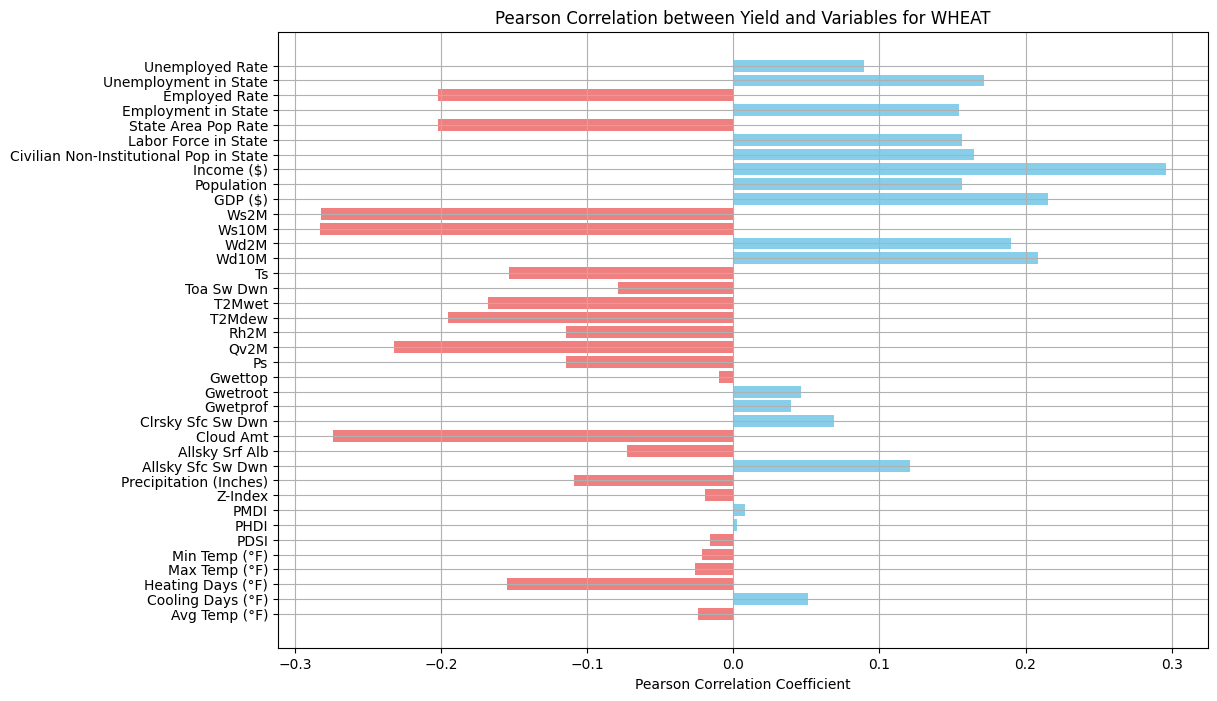

In [ ]:
def compute_and_plot_correlations_without_commo(df, commodity, agriculture_metric, title):

    combined_vars = climate_vars + econ_soc_vars

    # Filter dataframe for the specific commodity
    df_commodity = df[df['Commodity'] == commodity.upper()]

    # Check if there are enough data points to compute correlations
    if len(df_commodity) < 2:
        print(f"Not enough data points for {commodity}. Skipping correlation computation.")
        return

    correlation_results = {}
    for var in combined_vars:
        correlation_coefficient, _ = pearsonr(df_commodity[agriculture_metric], df_commodity[var])
        correlation_results[var] = correlation_coefficient

    # Print correlation results
    print(f"Pearson Correlation Coefficients - {agriculture_metric} for {commodity}:")
    for var, corr_coeff in correlation_results.items():
        print(f"{var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(12, 8))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(combined_vars, [correlation_results[var] for var in combined_vars], color=bar_colors)

    plt.xlabel('Pearson Correlation Coefficient')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage
commodity = 'WHEAT'  # Specify the commodity here
agriculture_metric = 'Yield'  # Specify the agriculture metric here
title = f'Pearson Correlation between {agriculture_metric} and Variables for {commodity}'

# Assuming merged_agri_climate_eco_df is your dataframe
compute_and_plot_correlations_without_commo(merged_agri_climate_eco_df, commodity, agriculture_metric, title)

### 2.1.2 Pearson Correlation on merged_agri_climate_eco_df_encode.

Pearson Correlation Coefficients - Yield:
Avg Temp (°F): 0.15028010059789568
Cooling Days (°F): 0.10507292284063992
Heating Days (°F): -0.1593666927745036
Max Temp (°F): 0.15629840449516835
Min Temp (°F): 0.14062089725455434
PDSI: -0.011047729805975837
PHDI: -0.011862582337465477
PMDI: -0.010337917495095925
Z-Index: -0.01970979305796057
Precipitation (Inches): 0.025529945270918057
Allsky Sfc Sw Dwn: 0.15909836375565478
Allsky Srf Alb: -0.07920024110901971
Cloud Amt: -0.19637941890150476
Clrsky Sfc Sw Dwn: 0.13690117695889178
Gwetprof: 0.04223038914076397
Gwetroot: 0.048340836978914566
Gwettop: -0.009209093653970372
Ps: 0.07275654332441099
Qv2M: 0.0768374689912794
Rh2M: -0.10010426578652702
T2Mdew: 0.09407589162489761
T2Mwet: 0.138160246906544
Toa Sw Dwn: 0.1288875307669651
Ts: 0.1716448992902143
Wd10M: -0.05278485141259629
Wd2M: -0.08480605637259654
Ws10M: -0.10589665154257713
Ws2M: -0.0771206367346164
GDP ($): 0.16591379675412268
Population: 0.17708540673425766
Income ($): 0.046265224

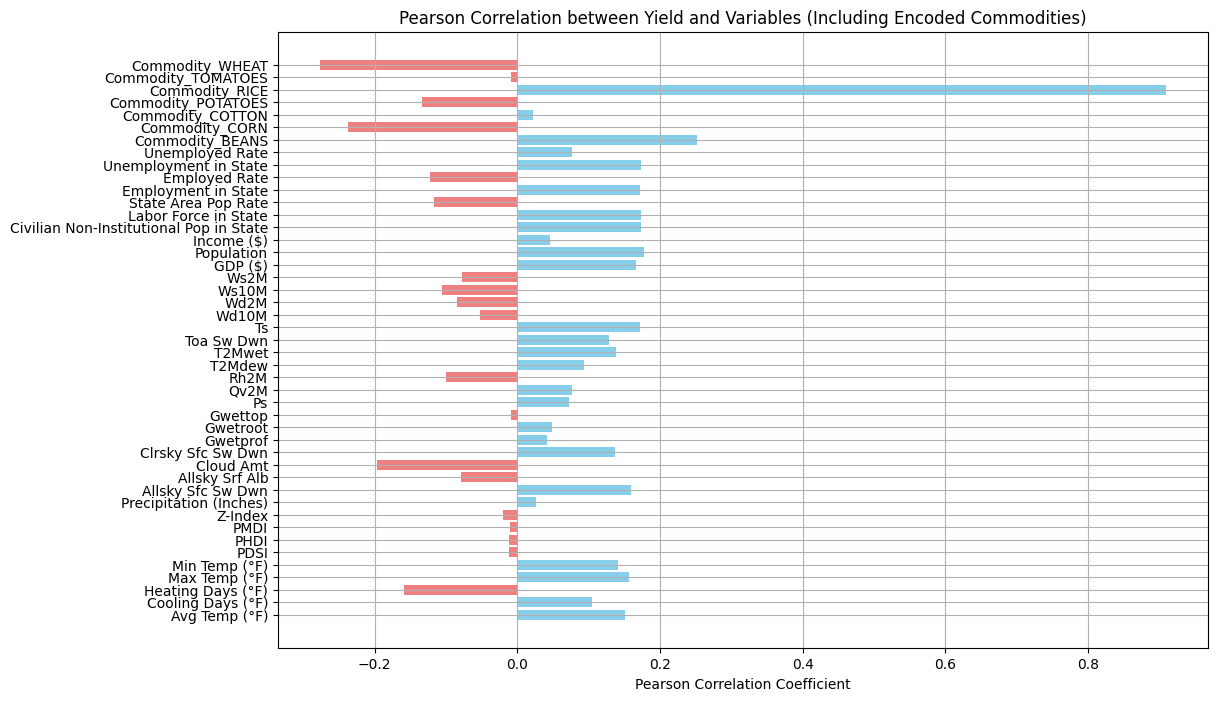

In [ ]:
def compute_and_plot_correlations_encoded(df, agriculture_metric, title):
    # Combine all variables
    combined_vars = climate_vars + econ_soc_vars + encoded_cols

    # Check if there are enough data points to compute correlations
    if len(df) < 2:
        print("Not enough data points. Skipping correlation computation.")
        return

    correlation_results = {}
    for var in combined_vars:
        correlation_coefficient, _ = pearsonr(df[agriculture_metric], df[var])
        correlation_results[var] = correlation_coefficient

    # Print correlation results
    print(f"Pearson Correlation Coefficients - {agriculture_metric}:")
    for var, corr_coeff in correlation_results.items():
        print(f"{var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(12, 8))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(combined_vars, [correlation_results[var] for var in combined_vars], color=bar_colors)

    # Adjust y-axis tick labels font size
    plt.yticks(fontsize=10)  # Adjust this value as needed

    plt.xlabel('Pearson Correlation Coefficient')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage
agriculture_metric = 'Yield'  # Specify the agriculture metric here
title = f'Pearson Correlation between {agriculture_metric} and Variables (Including Encoded Commodities)'

# Assuming merged_agri_climate_eco_df_encoded is your dataframe
compute_and_plot_correlations_encoded(merged_agri_climate_eco_df_encoded, agriculture_metric, title)

## 2.2 Partial Correlation Coefficient
- Compute partial correlations to measure the strength of the relationship between climate variables and Yield while controlling for economic/social variables.

### 2.2.1 Partial Correlation Coefficienton merged_agri_climate_eco_df.

Partial Correlation Coefficients - Yield for WHEAT:
Avg Temp (°F): 0.012759459931150576
Cooling Days (°F): 0.08444824904866062
Heating Days (°F): -0.3908750899962974
Max Temp (°F): -0.04754557020181672
Min Temp (°F): -0.006532291355246125
PDSI: 0.019256770305861495
PHDI: -0.018495756063638208
PMDI: 0.01824770343669155
Z-Index: 0.03003711146104681
Precipitation (Inches): -0.09835828253731595
Allsky Sfc Sw Dwn: 0.07516011811518532
Allsky Srf Alb: 0.006232087361847856
Cloud Amt: -0.11626776571331866
Clrsky Sfc Sw Dwn: -0.002011340854554274
Gwetprof: -0.28816180505361666
Gwetroot: 0.1104656151429547
Gwettop: 0.146593285512738
Ps: 0.11637314491169724
Qv2M: -0.09880114720685455
Rh2M: 0.008677656522087561
T2Mdew: -0.1273147675772399
T2Mwet: 0.18735893997649447
Toa Sw Dwn: 0.07589215624638589
Ts: -0.26425422877261373
Wd10M: 0.08032658426971462
Wd2M: 0.014841645479024048
Ws10M: -0.017748604174902375
Ws2M: 0.040554875639666005
GDP ($): -0.08413191428615333
Population: -0.2074456827221679
Income 

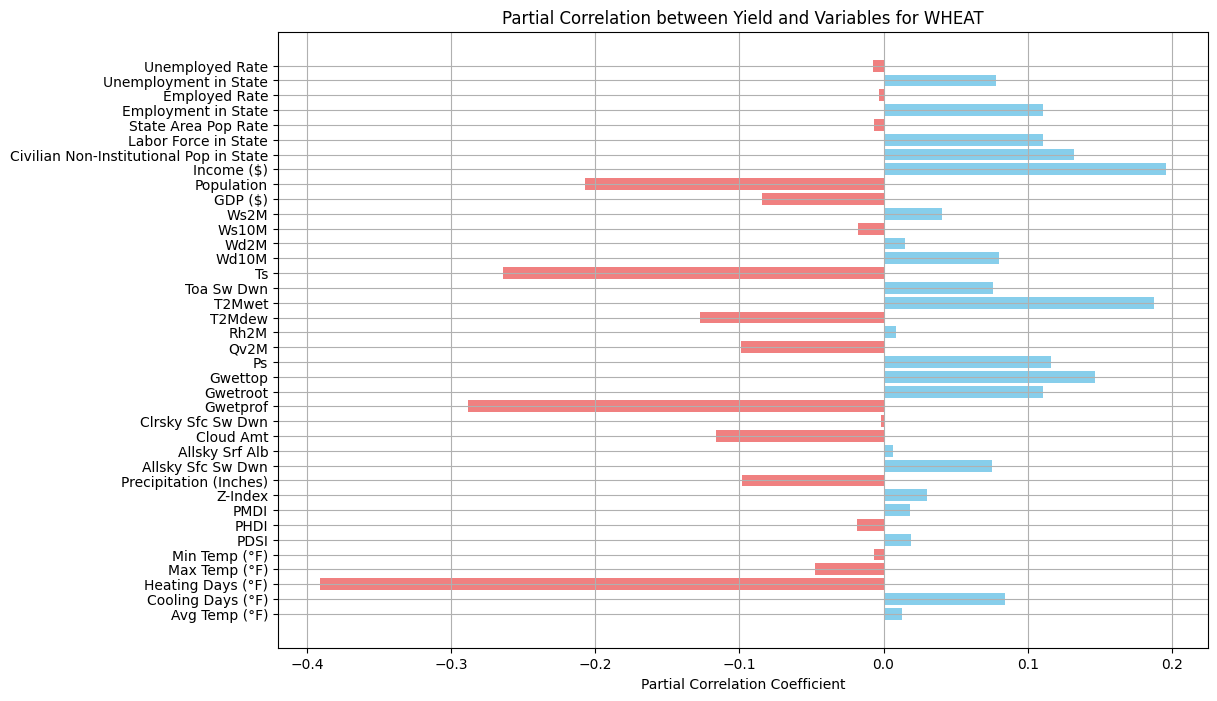

In [ ]:
def compute_and_plot_partial_correlations(df, commodity, agriculture_metric, title):

    combined_vars = climate_vars + econ_soc_vars

    # Filter dataframe for the specific commodity
    df_commodity = df[df['Commodity'] == commodity.upper()]

    # Check if there are enough data points to compute correlations
    if len(df_commodity) < 2:
        print(f"Not enough data points for {commodity}. Skipping correlation computation.")
        return

    correlation_results = {}
    for var in combined_vars:
        # Compute partial correlation controlling for all other combined variables
        control_vars = [v for v in combined_vars if v != var]
        partial_corr = pg.partial_corr(data=df_commodity, x=agriculture_metric, y=var, covar=control_vars)
        correlation_results[var] = partial_corr.iloc[0]['r']

    # Print correlation results
    print(f"Partial Correlation Coefficients - {agriculture_metric} for {commodity}:")
    for var, corr_coeff in correlation_results.items():
        print(f"{var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(12, 8))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(combined_vars, [correlation_results[var] for var in combined_vars], color=bar_colors)

    plt.xlabel('Partial Correlation Coefficient')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage
commodity = 'WHEAT'  # Specify the commodity here
agriculture_metric = 'Yield'  # Specify the agriculture metric here
title = f'Partial Correlation between {agriculture_metric} and Variables for {commodity}'

# Assuming merged_agri_climate_eco_df is your dataframe
compute_and_plot_partial_correlations(merged_agri_climate_eco_df, commodity, agriculture_metric, title)


### 2.2.2 Partial Correlation Coefficienton merged_agri_climate_eco_df_encode.

Partial Correlation Coefficients - Yield:
Avg Temp (°F): 0.018826702178305555
Cooling Days (°F): -0.04956549582863623
Heating Days (°F): -0.07700462322773217
Max Temp (°F): -0.01999977136679588
Min Temp (°F): -0.021152562597537568
PDSI: -0.005768940248367736
PHDI: -0.02333165895474978
PMDI: 0.012989644052032893
Z-Index: 0.031108988486567558
Precipitation (Inches): -0.009757024092160015
Allsky Sfc Sw Dwn: 0.03652070740574765
Allsky Srf Alb: 0.01818696748870172
Cloud Amt: -0.0725227326276917
Clrsky Sfc Sw Dwn: -0.018243033304919182
Gwetprof: -0.024374909174603186
Gwetroot: 0.07483204142850225
Gwettop: -0.06165510085922662
Ps: 0.019033799548487128
Qv2M: 0.04575977819044258
Rh2M: -0.038404838989006054
T2Mdew: 0.026375046172781465
T2Mwet: -0.02232232608172541
Toa Sw Dwn: -0.05159289558288284
Ts: -0.019258713108315992
Wd10M: 0.030138680470493683
Wd2M: 0.01061331166382338
Ws10M: 0.03183973566084409
Ws2M: -0.038343447491414315
GDP ($): -0.008568094663893272
Population: -0.01796925750214357
Inc

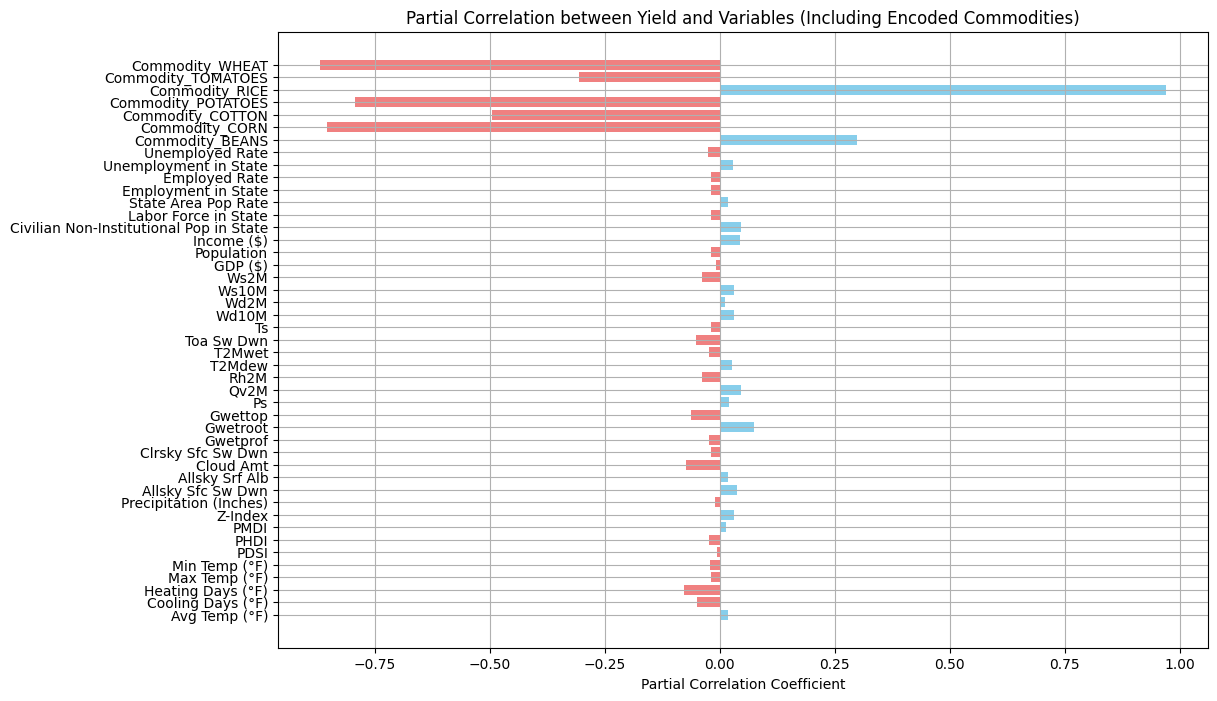

In [ ]:
def compute_and_plot_partial_correlations_encoded(df, agriculture_metric, title):

    combined_vars = climate_vars + econ_soc_vars + encoded_cols

    # Check if there are enough data points to compute correlations
    if len(df) < 2:
        print("Not enough data points. Skipping correlation computation.")
        return

    correlation_results = {}
    for var in combined_vars:
        # Compute partial correlation controlling for all other combined variables
        control_vars = [v for v in combined_vars if v != var]
        partial_corr = pg.partial_corr(data=df, x=agriculture_metric, y=var, covar=control_vars)
        correlation_results[var] = partial_corr.iloc[0]['r']

    # Print correlation results
    print(f"Partial Correlation Coefficients - {agriculture_metric}:")
    for var, corr_coeff in correlation_results.items():
        print(f"{var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(12, 8))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(combined_vars, [correlation_results[var] for var in combined_vars], color=bar_colors)

    # Adjust y-axis tick labels font size
    plt.yticks(fontsize=10)  # Adjust this value as needed

    plt.xlabel('Partial Correlation Coefficient')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage
agriculture_metric = 'Yield'  # Specify the agriculture metric here
title = f'Partial Correlation between {agriculture_metric} and Variables (Including Encoded Commodities)'

# Assuming merged_agri_climate_eco_df_encoded is your dataframe
compute_and_plot_partial_correlations_encoded(merged_agri_climate_eco_df_encoded, agriculture_metric, title)

# 3. Two Steps Analysis
- Detect the confounding effect of economic and societal variables on the relationship between climate variables and agricultural yield.

- Compare models with and without economic/social variables to see how the inclusion of these variables affects the coefficients/loading weights/feature importance of climate variables.
    
    Fit two models:

    Model 1: Yield ~ Climate Variables

    Model 2: Yield ~ Climate Variables + Economic/Societal Variables


In [ ]:
climate_vars = ['Avg Temp (°F)', 'Cooling Days (°F)', 'Heating Days (°F)', 'Max Temp (°F)',
                'Min Temp (°F)', 'PDSI', 'PHDI', 'PMDI', 'Z-Index', 'Precipitation (Inches)',
                'Allsky Sfc Sw Dwn', 'Allsky Srf Alb', 'Cloud Amt', 'Clrsky Sfc Sw Dwn',
                'Gwetprof', 'Gwetroot', 'Gwettop', 'Ps', 'Qv2M', 'Rh2M', 'T2Mdew',
                'T2Mwet', 'Toa Sw Dwn', 'Ts', 'Wd10M', 'Wd2M', 'Ws10M', 'Ws2M']
econ_soc_vars = ['GDP ($)', 'Population', 'Income ($)',
                    'Civilian Non-Institutional Pop in State',
                    'Labor Force in State', 'State Area Pop Rate',
                    'Employment in State', 'Employed Rate',
                    'Unemployment in State', 'Unemployed Rate']

encoded_cols = ['Commodity_BEANS', 'Commodity_CORN', 'Commodity_COTTON',
                    'Commodity_POTATOES', 'Commodity_RICE', 'Commodity_TOMATOES',
                    'Commodity_WHEAT']

## 3.1 Multilinear Regression


### 3.1.1 Multi linear regression on merged_agri_climate_eco_df.

In [ ]:
climate_vars = ['Avg Temp (°F)', 'Cooling Days (°F)', 'Heating Days (°F)', 'Max Temp (°F)',
                'Min Temp (°F)', 'PDSI', 'PHDI', 'PMDI', 'Z-Index', 'Precipitation (Inches)',
                'Allsky Sfc Sw Dwn', 'Allsky Srf Alb', 'Cloud Amt', 'Clrsky Sfc Sw Dwn',
                'Gwetprof', 'Gwetroot', 'Gwettop', 'Ps', 'Qv2M', 'Rh2M', 'T2Mdew',
                'T2Mwet', 'Toa Sw Dwn', 'Ts', 'Wd10M', 'Wd2M', 'Ws10M', 'Ws2M']
econ_soc_vars = ['GDP ($)', 'Population', 'Income ($)',
                    'Civilian Non-Institutional Pop in State',
                    'Labor Force in State', 'State Area Pop Rate',
                    'Employment in State', 'Employed Rate',
                    'Unemployment in State', 'Unemployed Rate']
encoded_cols = ['Commodity_BEANS', 'Commodity_CORN', 'Commodity_COTTON',
                    'Commodity_POTATOES', 'Commodity_RICE', 'Commodity_TOMATOES',
                    'Commodity_WHEAT']

In [ ]:
def perform_regression_analysis(df, yield_col, commodity_type):

    # Fixed column name for commodity
    commodity_col = 'Commodity'

    # Filter the DataFrame for the specified commodity type
    df_filtered = df[df[commodity_col] == commodity_type]

    if df_filtered.empty:
        raise ValueError(f"No data found for commodity type '{commodity_type}' in column '{commodity_col}'")

    # Define predictors
    predictors_climate = climate_vars
    predictors_full = predictors_climate + econ_soc_vars

    # Split data into features and target
    X_climate = df_filtered[predictors_climate]
    X_full = df_filtered[predictors_full]
    y = df_filtered[yield_col]

    # Add constant for intercept in statsmodels
    X_climate = sm.add_constant(X_climate)
    X_full = sm.add_constant(X_full)

    # Split the data
    X_train_climate, X_test_climate, y_train, y_test = train_test_split(X_climate, y, test_size=0.2, random_state=42)
    X_train_full, X_test_full = train_test_split(X_full, test_size=0.2, random_state=42)[0], train_test_split(X_full, test_size=0.2, random_state=42)[1]

    # Fit the first model with only climate variables
    model_climate = sm.OLS(y_train, X_train_climate).fit()
    y_pred_train_climate = model_climate.predict(X_test_climate)
    mse_climate = mean_squared_error(y_test, y_pred_train_climate)
    r2_climate = r2_score(y_test, y_pred_train_climate)

    print(f"Model for commodity type '{commodity_type}' with climate variables:")
    print(model_climate.summary())
    print(f"Mean Squared Error: {mse_climate:.4f}")
    print(f"R^2 Score: {r2_climate:.4f}")

    # Fit the second model with climate variables and economic/societal variables
    model_full = sm.OLS(y_train, X_train_full).fit()
    y_pred_train_full = model_full.predict(X_test_full)
    mse_full = mean_squared_error(y_test, y_pred_train_full)
    r2_full = r2_score(y_test, y_pred_train_full)

    print(f"\nModel for commodity type '{commodity_type}' with climate variables and economic/societal variables:")
    print(model_full.summary())
    print(f"Mean Squared Error: {mse_full:.4f}")
    print(f"R^2 Score: {r2_full:.4f}")

    # Extract coefficients and p-values for climate variables
    climate_coef_climate = model_climate.params
    climate_coef_full = model_full.params
    climate_pvalue_climate = model_climate.pvalues
    climate_pvalue_full = model_full.pvalues

    # Create a DataFrame for comparison
    climate_vars_with_coefficients = [var for var in climate_vars if var in climate_coef_climate.index]
    before_add_econ = [climate_coef_climate.get(var, np.nan) for var in climate_vars_with_coefficients]
    after_add_econ = [climate_coef_full.get(var, np.nan) for var in climate_vars_with_coefficients]
    p_value_before = [climate_pvalue_climate.get(var, np.nan) for var in climate_vars_with_coefficients]
    p_value_after = [climate_pvalue_full.get(var, np.nan) for var in climate_vars_with_coefficients]
    coefficient_change = [after - before for before, after in zip(before_add_econ, after_add_econ)]

    coeff_df = pd.DataFrame({
        'Climate Variable': climate_vars_with_coefficients,
        'Coefficient Before Adding Economic/Societal Variables': before_add_econ,
        'Coefficient After Adding Economic/Societal Variables': after_add_econ,
        'Coefficient Change': coefficient_change,
        'P-value Before Adding Economic/Societal Variables': p_value_before,
        'P-value After Adding Economic/Societal Variables': p_value_after
    })

    return coeff_df

# Usage example:
coeff_df = perform_regression_analysis(merged_agri_climate_eco_df, 'Yield', 'WHEAT')

Model for commodity type 'WHEAT' with climate variables:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     78.09
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          7.70e-228
Time:                        09:55:25   Log-Likelihood:                 2455.2
No. Observations:                1016   AIC:                            -4852.
Df Residuals:                     987   BIC:                            -4710.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
coeff_df

,Climate Variable,Coefficient Before Adding Economic/Societal Variables,Coefficient After Adding Economic/Societal Variables,Coefficient Change,P-value Before Adding Economic/Societal Variables,P-value After Adding Economic/Societal Variables
0,Avg Temp (°F),0.102633,0.098535,-0.004098,0.694812,0.670579
1,Cooling Days (°F),0.017767,0.009836,-0.007931,0.001772,0.060438
2,Heating Days (°F),-0.129154,-0.119320,0.009834,0.000000,0.000000
3,Max Temp (°F),-0.264538,-0.207601,0.056937,0.065335,0.102407
4,Min Temp (°F),-0.008825,-0.016234,-0.007410,0.942625,0.881026
5,PDSI,-0.001261,0.001188,0.002449,0.741983,0.727751
6,PHDI,0.000364,-0.002010,-0.002375,0.942651,0.653523
7,PMDI,0.004092,0.001838,-0.002254,0.495618,0.729093
8,Z-Index,-0.004704,0.003562,0.008266,0.113515,0.195447
9,Precipitation (Inches),0.003026,-0.017506,-0.020533,0.564242,0.000648


### 3.1.2 Multi linear regression on merged_agri_climate_eco_df_encode.

In [ ]:
def perform_regression_analysis_with_ancova(df, yield_col='Yield'):
    # Define predictors
    predictors_climate_encoded = climate_vars + encoded_cols
    predictors_full = predictors_climate_encoded + econ_soc_vars

    # Split data into features and target
    X_climate_encoded = df[predictors_climate_encoded]
    X_full = df[predictors_full]
    y = df[yield_col]

    # Add constant for intercept in statsmodels
    X_climate_encoded = sm.add_constant(X_climate_encoded)
    X_full = sm.add_constant(X_full)

    # Split the data
    X_train_climate_encoded, X_test_climate_encoded, y_train, y_test = train_test_split(X_climate_encoded, y, test_size=0.2, random_state=42)
    X_train_full, X_test_full = train_test_split(X_full, test_size=0.2, random_state=42)[0], train_test_split(X_full, test_size=0.2, random_state=42)[1]

    # Fit the first model with only climate variables and encoded columns
    model_climate_encoded = sm.OLS(y_train, X_train_climate_encoded).fit()
    y_pred_train_climate_encoded = model_climate_encoded.predict(X_test_climate_encoded)
    mse_climate_encoded = mean_squared_error(y_test, y_pred_train_climate_encoded)
    r2_climate_encoded = r2_score(y_test, y_pred_train_climate_encoded)

    print("Model with climate and encoded variables:")
    print(model_climate_encoded.summary())
    print(f"Mean Squared Error: {mse_climate_encoded:.4f}")
    print(f"R^2 Score: {r2_climate_encoded:.4f}")

    # Fit the second model with climate, encoded, and economic/societal variables
    model_full = sm.OLS(y_train, X_train_full).fit()
    y_pred_train_full = model_full.predict(X_test_full)
    mse_full = mean_squared_error(y_test, y_pred_train_full)
    r2_full = r2_score(y_test, y_pred_train_full)

    print("\nModel with climate, encoded, and economic/societal variables:")
    print(model_full.summary())
    print(f"Mean Squared Error: {mse_full:.4f}")
    print(f"R^2 Score: {r2_full:.4f}")

    # Perform ANCOVA to compare the two models
    ancova_results = sm.stats.anova_lm(model_climate_encoded, model_full)
    print("\nANCOVA Results:")
    print(ancova_results)

    # Extract coefficients and p-values for climate variables
    climate_coef_climate_encoded = model_climate_encoded.params
    climate_coef_full = model_full.params
    climate_pvalue_climate_encoded = model_climate_encoded.pvalues
    climate_pvalue_full = model_full.pvalues

    # Create a DataFrame for comparison
    climate_vars_with_coefficients = [var for var in climate_vars if var in climate_coef_climate_encoded.index]
    before_add_econ = [climate_coef_climate_encoded.get(var, np.nan) for var in climate_vars_with_coefficients]
    after_add_econ = [climate_coef_full.get(var, np.nan) for var in climate_vars_with_coefficients]
    p_value_before = [climate_pvalue_climate_encoded.get(var, np.nan) for var in climate_vars_with_coefficients]
    p_value_after = [climate_pvalue_full.get(var, np.nan) for var in climate_vars_with_coefficients]
    coefficient_change = [after - before for before, after in zip(before_add_econ, after_add_econ)]

    coeff_df = pd.DataFrame({
        'Climate Variable': climate_vars_with_coefficients,
        'Coefficient Before Adding Economic/Societal Variables': before_add_econ,
        'Coefficient After Adding Economic/Societal Variables': after_add_econ,
        'Coefficient Change': coefficient_change,
        'P-value Before Adding Economic/Societal Variables': p_value_before,
        'P-value After Adding Economic/Societal Variables': p_value_after
    })

    return coeff_df

# Usage:
coeff_df = perform_regression_analysis_with_ancova(merged_agri_climate_eco_df_encoded)


Model with climate and encoded variables:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2780.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:25   Log-Likelihood:                -3435.4
No. Observations:                3744   AIC:                             6941.
Df Residuals:                    3709   BIC:                             7159.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
coeff_df

,Climate Variable,Coefficient Before Adding Economic/Societal Variables,Coefficient After Adding Economic/Societal Variables,Coefficient Change,P-value Before Adding Economic/Societal Variables,P-value After Adding Economic/Societal Variables
0,Avg Temp (°F),1.552225,2.108242,0.556018,0.680921,0.569918
1,Cooling Days (°F),-0.170859,-0.246648,-0.075788,0.037800,0.003614
2,Heating Days (°F),-0.600730,-0.441737,0.158993,0.000025,0.001899
3,Max Temp (°F),-1.623213,-0.928167,0.695045,0.433862,0.649040
4,Min Temp (°F),-0.766499,-1.159764,-0.393265,0.665285,0.505630
5,PDSI,-0.034473,-0.016708,0.017765,0.524834,0.754781
6,PHDI,-0.074990,-0.081752,-0.006762,0.309242,0.258914
7,PMDI,0.071570,0.046612,-0.024958,0.413986,0.587957
8,Z-Index,0.033372,0.081555,0.048183,0.447242,0.071573
9,Precipitation (Inches),0.018698,-0.062700,-0.081397,0.805139,0.452690


## 3.2 Partial Least Square Regression

### 3.2.1 Partial Least Square Regression on merged_agri_climate_eco_df.

In [ ]:
def perform_regression_analysis(df, yield_col, commodity_type):

    # Fixed column name for commodity
    commodity_col = 'Commodity'

    # Filter the DataFrame for the specified commodity type
    df_filtered = df[df[commodity_col] == commodity_type]

    if df_filtered.empty:
        raise ValueError(f"No data found for commodity type '{commodity_type}' in column '{commodity_col}'")

    # Define predictors
    predictors_climate = climate_vars
    predictors_full = predictors_climate + econ_soc_vars

    # Split data into features and target
    X_climate = df_filtered[predictors_climate]
    X_full = df_filtered[predictors_full]
    y = df_filtered[yield_col]

    # Split the data
    X_train_climate, X_test_climate, y_train, y_test = train_test_split(X_climate, y, test_size=0.2, random_state=42)
    X_train_full, X_test_full = train_test_split(X_full, test_size=0.2, random_state=42)[0], train_test_split(X_full, test_size=0.2, random_state=42)[1]

    # Function to determine the optimal number of components for PLSR using cross-validation
    def select_optimal_n_components(X_train, y_train, threshold=0.70):
        max_components = min(X_train.shape[1], len(y_train))  # Maximum number of components to test
        best_n_components = 1
        best_score = -np.inf

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        for n_components in range(1, max_components + 1):
            pls = PLSRegression(n_components=n_components)
            scores = cross_val_score(pls, X_train, y_train, cv=kf, scoring='r2')
            mean_score = np.mean(scores)

            if mean_score > best_score:
                best_score = mean_score
                best_n_components = n_components

        return best_n_components

    # Select the number of components for the climate-only model
    optimal_n_components_climate = select_optimal_n_components(X_train_climate, y_train)
    print(f"\nOptimal number of components for climate-only PLSR model: {optimal_n_components_climate}")

    # Fit PLSR model with only climate variables
    pls_climate = PLSRegression(n_components=optimal_n_components_climate)
    pls_climate.fit(X_train_climate, y_train)
    y_pred_train_climate = pls_climate.predict(X_test_climate)
    mse_climate = mean_squared_error(y_test, y_pred_train_climate)
    r2_climate = r2_score(y_test, y_pred_train_climate)

    print(f"\nPLSR Model for commodity type '{commodity_type}' with climate variables:")
    print(f"Mean Squared Error: {mse_climate:.4f}")
    print(f"R^2 Score: {r2_climate:.4f}")

    # Select the number of components for the full model (climate + economic/societal variables)
    optimal_n_components_full = select_optimal_n_components(X_train_full, y_train)
    print(f"\nOptimal number of components for full PLSR model: {optimal_n_components_full}")

    # Fit PLSR model with climate + economic/societal variables
    pls_full = PLSRegression(n_components=optimal_n_components_full)
    pls_full.fit(X_train_full, y_train)
    y_pred_train_full = pls_full.predict(X_test_full)
    mse_full = mean_squared_error(y_test, y_pred_train_full)
    r2_full = r2_score(y_test, y_pred_train_full)

    print(f"\nPLSR Model for commodity type '{commodity_type}' with climate variables and economic/societal variables:")
    print(f"Mean Squared Error: {mse_full:.4f}")
    print(f"R^2 Score: {r2_full:.4f}")

    # Extract PLSR loadings
    pls_climate_loadings = pls_climate.x_weights_
    pls_full_loadings = pls_full.x_weights_

    # Create DataFrames for PLSR loadings
    pls_climate_loadings_df = pd.DataFrame(pls_climate_loadings, columns=[f'PLSR Loading Weight {i+1}' for i in range(pls_climate_loadings.shape[1])], index=X_climate.columns)
    pls_full_loadings_df = pd.DataFrame(pls_full_loadings, columns=[f'PLSR Loading Weight {i+1}' for i in range(pls_full_loadings.shape[1])], index=X_full.columns)


    # Create DataFrame for comparison of loading weights
    climate_vars_with_loadings = [var for var in climate_vars if var in pls_climate_loadings_df.index]
    before_add_econ = [pls_climate_loadings_df.loc[var].values[0] if var in pls_climate_loadings_df.index else np.nan for var in climate_vars_with_loadings]
    after_add_econ = [pls_full_loadings_df.loc[var].values[0] if var in pls_full_loadings_df.index else np.nan for var in climate_vars_with_loadings]
    loading_weight_change = [after - before for before, after in zip(before_add_econ, after_add_econ)]

    # Note: P-values are not available from PLSR; you can include them only if using OLS models

    coeff_df = pd.DataFrame({
        'Climate Variable': climate_vars_with_loadings,
        'Loading Weight Before Adding Economic/Societal Variables': before_add_econ,
        'Loading Weight After Adding Economic/Societal Variables': after_add_econ,
        'Loading Weight Change': loading_weight_change,
        # P-values are not included here as PLSR does not provide p-values.
    })

    return coeff_df

# Usage example:
perform_regression_analysis(merged_agri_climate_eco_df, 'Yield', 'WHEAT')




Optimal number of components for climate-only PLSR model: 27

PLSR Model for commodity type 'WHEAT' with climate variables:
Mean Squared Error: 0.0005
R^2 Score: 0.6946

Optimal number of components for full PLSR model: 36

PLSR Model for commodity type 'WHEAT' with climate variables and economic/societal variables:
Mean Squared Error: 0.0004
R^2 Score: 0.7701


,Climate Variable,Loading Weight Before Adding Economic/Societal Variables,Loading Weight After Adding Economic/Societal Variables,Loading Weight Change
0,Avg Temp (°F),0.045883,-0.035638,-0.081520
1,Cooling Days (°F),-0.040944,0.031802,0.072746
2,Heating Days (°F),0.197186,-0.153157,-0.350343
3,Max Temp (°F),0.053341,-0.041431,-0.094771
4,Min Temp (°F),0.037163,-0.028865,-0.066029
5,PDSI,0.003262,-0.002534,-0.005796
6,PHDI,-0.003121,0.002424,0.005545
7,PMDI,-0.014587,0.011330,0.025917
8,Z-Index,0.017240,-0.013391,-0.030631
9,Precipitation (Inches),0.130934,-0.101698,-0.232632


In [ ]:
coeff_df

,Climate Variable,Coefficient Before Adding Economic/Societal Variables,Coefficient After Adding Economic/Societal Variables,Coefficient Change,P-value Before Adding Economic/Societal Variables,P-value After Adding Economic/Societal Variables
0,Avg Temp (°F),1.552225,2.108242,0.556018,0.680921,0.569918
1,Cooling Days (°F),-0.170859,-0.246648,-0.075788,0.037800,0.003614
2,Heating Days (°F),-0.600730,-0.441737,0.158993,0.000025,0.001899
3,Max Temp (°F),-1.623213,-0.928167,0.695045,0.433862,0.649040
4,Min Temp (°F),-0.766499,-1.159764,-0.393265,0.665285,0.505630
5,PDSI,-0.034473,-0.016708,0.017765,0.524834,0.754781
6,PHDI,-0.074990,-0.081752,-0.006762,0.309242,0.258914
7,PMDI,0.071570,0.046612,-0.024958,0.413986,0.587957
8,Z-Index,0.033372,0.081555,0.048183,0.447242,0.071573
9,Precipitation (Inches),0.018698,-0.062700,-0.081397,0.805139,0.452690


### 3.2.2 Partial Least Square Regression on merged_agri_climate_eco_df_encode.

In [ ]:
def perform_regression_analysis(df, yield_col):

    # Define predictors
    predictors_climate = climate_vars
    predictors_full = predictors_climate + econ_soc_vars + encoded_cols

    # Split data into features and target
    X = df[predictors_full]
    y = df[yield_col]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Function to determine the optimal number of components for PLSR using cross-validation
    def select_optimal_n_components(X_train, y_train):
        max_components = min(X_train.shape[1], len(y_train))  # Maximum number of components to test
        best_n_components = 1
        best_score = -np.inf

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        for n_components in range(1, max_components + 1):
            pls = PLSRegression(n_components=n_components)
            scores = cross_val_score(pls, X_train, y_train, cv=kf, scoring='r2')
            mean_score = np.mean(scores)

            if mean_score > best_score:
                best_score = mean_score
                best_n_components = n_components

        return best_n_components

    # Select the number of components for the climate-only model
    X_climate = df[predictors_climate]
    X_train_climate, X_test_climate, y_train, y_test = train_test_split(X_climate, y, test_size=0.2, random_state=42)
    optimal_n_components_climate = select_optimal_n_components(X_train_climate, y_train)
    print(f"\nOptimal number of components for climate-only PLSR model: {optimal_n_components_climate}")

    # Fit PLSR model with only climate variables
    pls_climate = PLSRegression(n_components=optimal_n_components_climate)
    pls_climate.fit(X_train_climate, y_train)
    y_pred_train_climate = pls_climate.predict(X_test_climate)
    mse_climate = mean_squared_error(y_test, y_pred_train_climate)
    r2_climate = r2_score(y_test, y_pred_train_climate)

    print(f"\nPLSR Model with climate variables:")
    print(f"Mean Squared Error: {mse_climate:.4f}")
    print(f"R^2 Score: {r2_climate:.4f}")

    # Select the number of components for the full model (climate + economic/societal + encoded variables)
    optimal_n_components_full = select_optimal_n_components(X_train, y_train)
    print(f"\nOptimal number of components for full PLSR model: {optimal_n_components_full}")

    # Fit PLSR model with all variables
    pls_full = PLSRegression(n_components=optimal_n_components_full)
    pls_full.fit(X_train, y_train)
    y_pred_train_full = pls_full.predict(X_test)
    mse_full = mean_squared_error(y_test, y_pred_train_full)
    r2_full = r2_score(y_test, y_pred_train_full)

    print(f"\nPLSR Model with climate, economic/societal, and encoded variables:")
    print(f"Mean Squared Error: {mse_full:.4f}")
    print(f"R^2 Score: {r2_full:.4f}")

    # Extract PLSR loadings
    pls_climate_loadings = pls_climate.x_weights_
    pls_full_loadings = pls_full.x_weights_

    # Create DataFrames for PLSR loadings
    pls_climate_loadings_df = pd.DataFrame(pls_climate_loadings, columns=[f'PLSR Loading Weight {i+1}' for i in range(pls_climate_loadings.shape[1])], index=X_climate.columns)
    pls_full_loadings_df = pd.DataFrame(pls_full_loadings, columns=[f'PLSR Loading Weight {i+1}' for i in range(pls_full_loadings.shape[1])], index=X.columns)

    # Create DataFrame for comparison of loading weights
    climate_vars_with_loadings = [var for var in climate_vars if var in pls_climate_loadings_df.index]
    before_add_econ = [pls_climate_loadings_df.loc[var].values[0] if var in pls_climate_loadings_df.index else np.nan for var in climate_vars_with_loadings]
    after_add_econ = [pls_full_loadings_df.loc[var].values[0] if var in pls_full_loadings_df.index else np.nan for var in climate_vars_with_loadings]
    loading_weight_change = [after - before for before, after in zip(before_add_econ, after_add_econ)]

    coeff_df = pd.DataFrame({
        'Climate Variable': climate_vars_with_loadings,
        'Loading Weight Before Adding Economic/Societal Variables': before_add_econ,
        'Loading Weight After Adding Economic/Societal Variables': after_add_econ,
        'Loading Weight Change': loading_weight_change,
        # Note: P-values are not included here as PLSR does not provide p-values.
    })

    return coeff_df

# Usage example with encoded DataFrame
perform_regression_analysis(merged_agri_climate_eco_df_encoded, 'Yield')


Optimal number of components for climate-only PLSR model: 19

PLSR Model with climate variables:
Mean Squared Error: 8.2771
R^2 Score: 0.0674

Optimal number of components for full PLSR model: 31

PLSR Model with climate, economic/societal, and encoded variables:
Mean Squared Error: 0.3593
R^2 Score: 0.9595


,Climate Variable,Loading Weight Before Adding Economic/Societal Variables,Loading Weight After Adding Economic/Societal Variables,Loading Weight Change
0,Avg Temp (°F),-0.266920,0.121115,0.388035
1,Cooling Days (°F),-0.189021,0.085769,0.274790
2,Heating Days (°F),0.281840,-0.127885,-0.409725
3,Max Temp (°F),-0.277777,0.126041,0.403818
4,Min Temp (°F),-0.249620,0.113265,0.362885
5,PDSI,0.024077,-0.010925,-0.035001
6,PHDI,0.029724,-0.013487,-0.043211
7,PMDI,0.024390,-0.011067,-0.035456
8,Z-Index,0.044807,-0.020331,-0.065138
9,Precipitation (Inches),-0.039092,0.017738,0.056831


# 4. Three Steps Analysis - Mediation Analysis


- Direct Effect (c'):

    The direct effect measures how changes in climate variables affect Yield (DV), while holding the mediator (economic variable, M) constant.

    Path: Climate Variable (IV) → Yield (DV) (controlling for Economic Variable (M))

    Interpretation: This path quantifies the direct impact of changes in climate variables on Yield, considering the economic variable as a constant.

- Indirect Effect (a * b):

    The indirect effect measures the impact of climate variables on Yield that occurs through changes in the economic variable.
    Path a: Climate Variable (IV) → Economic Variable (M)
    Path b: Economic Variable (M) → Yield (DV)
    Interpretation: The product of Path a and Path b quantifies how much of the effect of climate variables on Yield is transmitted through changes in the economic variable.

- Total Effect:

    The total effect represents the overall impact of climate variables on Yield, including both the direct and indirect effects through economic variables.
    Path: Climate Variable (IV) → Yield (DV)
    Interpretation: This path captures all possible pathways through which climate variables influence Yield, whether direct or indirect through changes in the economic variable.





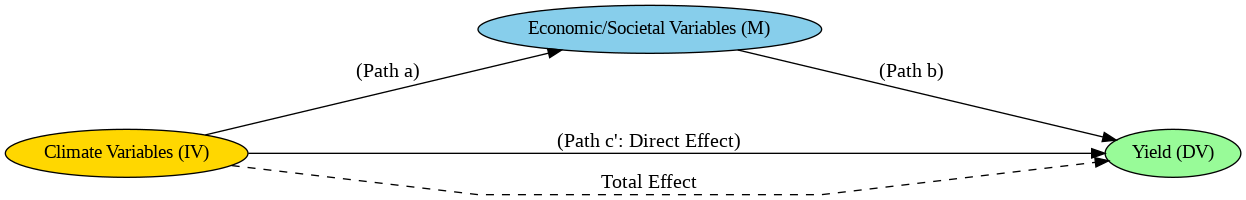

In [ ]:
# Create a directed graph
dot = Digraph(graph_attr={'rankdir': 'LR', 'ranksep': '1.2 equally', 'splines': 'polyline', 'nodesep': '0.8', 'width': '1.5', 'height': '1.3'})

# Define the nodes with updated colors
dot.node('IV', 'Climate Variables (IV)', shape='ellipse', style='filled', fillcolor='#FFD700')
dot.node('M', 'Economic/Societal Variables (M)', shape='ellipse', style='filled', fillcolor='#87CEEB')
dot.node('DV', 'Yield (DV)', shape='ellipse', style='filled', fillcolor='#98FB98')

# Define the edges (paths) with updated colors and total effect line in dark color
dot.edge('IV', 'DV', label="(Path c': Direct Effect)", fontsize='15',  pos='0.5,0.7!')  # Adjusted color to Cornflower Blue
dot.edge('IV', 'M', label='(Path a)', fontsize='15')  # Adjusted color to Medium Sea Green
dot.edge('M', 'DV', label='(Path b)', fontsize='15')  # Tomato
dot.edge('IV', 'DV', label='Total Effect', style='dashed', fontsize='15')  # Adjusted color to Blue Violet

# Render the graph and display it
dot.format = 'png'
graph_path = dot.render('mediation_analysis_paths_horizontal_fancy', format='png', engine='dot')
Image(graph_path)


**Comparison to Make**:
- Direct Effect (c) vs. Total Effect:

    If the Total Effect > Direct Effect: This suggests that the economic variable plays a significant role in mediating the effect of climate variables on yield.
    The larger the difference, the stronger the mediation effect of the economic variable.

    If the Total Effect ≈ Direct Effect: This indicates that the economic variable has little to no confounding effect.The effect of climate variables on yield is mostly direct.

- Proportion of Indirect Effect:

    Calculate the proportion of the total effect that is indirect:
    (Indirect Effect/Total Effect)×100%

    This proportion gives you a clear picture of the extent to which the economic variable mediates the effect of climate variables on yield.


## 4.1 Multiple Linear regression

In [ ]:
def perform_mediation_analysis(df, yield_col, climate_vars, econ_soc_vars, encoded_cols):
    # Ensure encoded columns are present in the DataFrame
    missing_cols = [col for col in encoded_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns {missing_cols} are not found in the DataFrame.")

    # Define predictors
    predictors_climate = climate_vars + encoded_cols
    predictors_full = predictors_climate + econ_soc_vars

    # Split data into features and target
    X_climate = df[predictors_climate]
    X_full = df[predictors_full]
    y = df[yield_col]

    # Split the data
    X_train_climate, X_test_climate, y_train, y_test = train_test_split(X_climate, y, test_size=0.2, random_state=42)
    X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

    # Total Effect (Climate Variables Only) using Linear Regression
    model_climate = LinearRegression().fit(X_train_climate, y_train)
    y_pred_test_climate = model_climate.predict(X_test_climate)
    mse_climate = mean_squared_error(y_test, y_pred_test_climate)
    r2_climate = r2_score(y_test, y_pred_test_climate)

    print(f"Model Total Effect (Climate Variables Only):")
    print(f"Coefficients: {model_climate.coef_}")
    print(f"Mean Squared Error: {mse_climate:.4f}")
    print(f"R^2 Score: {r2_climate:.4f}")

    # Direct Effect (Climate + Economic/Societal Variables) using Linear Regression
    model_full = LinearRegression().fit(X_train_full, y_train)
    y_pred_test_full = model_full.predict(X_test_full)
    mse_full = mean_squared_error(y_test, y_pred_test_full)
    r2_full = r2_score(y_test, y_pred_test_full)

    print(f"\nModel Direct Effect (Climate + Economic/Societal Variables):")
    print(f"Coefficients: {model_full.coef_}")
    print(f"Mean Squared Error: {mse_full:.4f}")
    print(f"R^2 Score: {r2_full:.4f}")

    # Calculate indirect effects
    indirect_effects = {}
    for econ_var in econ_soc_vars:
        # Model for each economic/societal variable predicted by climate variables
        model_econ = LinearRegression().fit(X_climate, df[econ_var])
        indirect_effects[econ_var] = model_econ.coef_

    # Calculate indirect effect for each climate variable
    indirect_effect = {var: 0 for var in climate_vars}
    for econ_var in econ_soc_vars:
        if econ_var in predictors_full:
            econ_var_index = predictors_full.index(econ_var)
            for i, climate_var in enumerate(climate_vars):
                indirect_effect[climate_var] += (
                    indirect_effects[econ_var][i] * model_full.coef_[econ_var_index]
                )

    # Prepare the results dataframe
    total_effect = model_climate.coef_
    direct_effect = model_full.coef_

    climate_vars_with_coefficients = [var for var in climate_vars]
    econ_vars_with_coefficients = [var for var in econ_soc_vars]

    # Extract values from the model coefficients
    before_add_econ = total_effect[:len(climate_vars_with_coefficients)]
    after_add_econ = direct_effect[:len(climate_vars_with_coefficients)]

    # Calculate indirect effects for climate variables
    indirect_econ = [indirect_effect.get(var, np.nan) for var in climate_vars_with_coefficients]

    # Calculate proportion of indirect effect only where there's a total effect
    proportion_indirect_effect = [
        (indirect / total) * 100 if (not np.isnan(indirect) and not np.isnan(total) and total != 0) else np.nan
        for indirect, total in zip(indirect_econ, before_add_econ)
    ]

    # Prepare the DataFrame
    mediation_df = pd.DataFrame({
        'Variable': climate_vars_with_coefficients,
        'Total Effect (c)': before_add_econ,
        'Direct Effect (c\')': after_add_econ,
        'Indirect Effect (a * b)': indirect_econ,
        'Proportion of Indirect Effect (%)': proportion_indirect_effect
    })

    return mediation_df

# Example usage
perform_mediation_analysis(merged_agri_climate_eco_df_encoded, yield_col='Yield', climate_vars=climate_vars, econ_soc_vars=econ_soc_vars, encoded_cols=encoded_cols)


Model Total Effect (Climate Variables Only):
Coefficients: [ 1.55222472 -0.17085939 -0.60072962 -1.62321255 -0.76649934 -0.0344732
 -0.07498955  0.07156995  0.03337244  0.01869777  0.01142158  0.01691253
 -0.33810392  0.03167649 -0.24861459  1.04766267 -0.93647774 -0.06984056
  0.74488772 -0.1521553  -0.59826944  1.48167739 -0.4865996  -0.99116465
  0.05039761  0.05731708  0.61678486 -0.67592963  0.65097959 -2.74180295
 -1.27610195 -2.38872341 10.71047643 -2.03046112 -2.9243666 ]
Mean Squared Error: 0.3713
R^2 Score: 0.9582

Model Direct Effect (Climate + Economic/Societal Variables):
Coefficients: [ 2.10824243e+00 -2.46647864e-01 -4.41736813e-01 -9.28167409e-01
 -1.15976448e+00 -1.67084012e-02 -8.17518467e-02  4.66123309e-02
  8.15554615e-02 -6.26995566e-02  1.25027765e-01  4.09961639e-02
 -1.93533502e-01 -7.12420518e-02 -1.69017823e-01  8.96257672e-01
 -7.90301815e-01  1.13987997e-01  6.47063629e-01 -2.17197111e-01
  1.00392251e+00 -1.59029903e+00 -4.31605631e-01 -1.58581066e-01
  5.

,Variable,Total Effect (c),Direct Effect (c'),Indirect Effect (a * b),Proportion of Indirect Effect (%)
0,Avg Temp (°F),1.552225,2.108242,-0.308368,-19.866188
1,Cooling Days (°F),-0.170859,-0.246648,0.073708,-43.139737
2,Heating Days (°F),-0.600730,-0.441737,-0.146402,24.370679
3,Max Temp (°F),-1.623213,-0.928167,-0.804043,49.534048
4,Min Temp (°F),-0.766499,-1.159764,0.293058,-38.233338
5,PDSI,-0.034473,-0.016708,-0.020767,60.241502
6,PHDI,-0.074990,-0.081752,0.000182,-0.242292
7,PMDI,0.071570,0.046612,0.031558,44.093895
8,Z-Index,0.033372,0.081555,-0.045827,-137.320342
9,Precipitation (Inches),0.018698,-0.062700,0.083087,444.367321


## 4.2 Ridge Regression

In [ ]:
def perform_mediation_analysis(df, yield_col, climate_vars, econ_soc_vars, encoded_cols, alpha):
    # Ensure encoded columns are present in the DataFrame
    missing_cols = [col for col in encoded_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns {missing_cols} are not found in the DataFrame.")

    # Define predictors
    predictors_climate = climate_vars + encoded_cols
    predictors_full = predictors_climate + econ_soc_vars

    # Split data into features and target
    X_climate = df[predictors_climate]
    X_full = df[predictors_full]
    y = df[yield_col]

    # Split the data
    X_train_climate, X_test_climate, y_train, y_test = train_test_split(X_climate, y, test_size=0.2, random_state=42)
    X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

    # Total Effect (Climate Variables Only) using Ridge with a single alpha value
    model_climate = Ridge(alpha=alpha).fit(X_train_climate, y_train)
    y_pred_test_climate = model_climate.predict(X_test_climate)
    mse_climate = mean_squared_error(y_test, y_pred_test_climate)
    r2_climate = r2_score(y_test, y_pred_test_climate)

    print(f"Model Total Effect (Climate Variables Only):")
    print(f"Coefficients: {model_climate.coef_}")
    print(f"Mean Squared Error: {mse_climate:.4f}")
    print(f"R^2 Score: {r2_climate:.4f}")

    # Direct Effect (Climate + Economic/Societal Variables) using Ridge with a single alpha value
    model_full = Ridge(alpha=alpha).fit(X_train_full, y_train)
    y_pred_test_full = model_full.predict(X_test_full)
    mse_full = mean_squared_error(y_test, y_pred_test_full)
    r2_full = r2_score(y_test, y_pred_test_full)

    print(f"\nModel Direct Effect (Climate + Economic/Societal Variables):")
    print(f"Coefficients: {model_full.coef_}")
    print(f"Mean Squared Error: {mse_full:.4f}")
    print(f"R^2 Score: {r2_full:.4f}")

    # Calculate indirect effects
    indirect_effects = {}
    for econ_var in econ_soc_vars:
        # Model for each economic/societal variable predicted by climate variables
        model_econ = Ridge(alpha=alpha).fit(X_climate, df[econ_var])
        indirect_effects[econ_var] = model_econ.coef_

    # Calculate indirect effect for each climate variable
    indirect_effect = {var: 0 for var in climate_vars}
    for econ_var in econ_soc_vars:
        if econ_var in predictors_full:
            econ_var_index = predictors_full.index(econ_var)
            for i, climate_var in enumerate(climate_vars):
                indirect_effect[climate_var] += (
                    indirect_effects[econ_var][i] * model_full.coef_[econ_var_index]
                )

    # Prepare the results dataframe
    total_effect = model_climate.coef_
    direct_effect = model_full.coef_

    climate_vars_with_coefficients = [var for var in climate_vars]
    econ_vars_with_coefficients = [var for var in econ_soc_vars]

    # Extract values from the model coefficients
    before_add_econ = total_effect[:len(climate_vars_with_coefficients)]
    after_add_econ = direct_effect[:len(climate_vars_with_coefficients)]

    # Calculate indirect effects for climate variables
    indirect_econ = [indirect_effect.get(var, np.nan) for var in climate_vars_with_coefficients]

    # Calculate proportion of indirect effect only where there's a total effect
    proportion_indirect_effect = [
        (indirect / total) * 100 if (not np.isnan(indirect) and not np.isnan(total) and total != 0) else np.nan
        for indirect, total in zip(indirect_econ, before_add_econ)
    ]

    # Prepare the DataFrame
    mediation_df = pd.DataFrame({
        'Variable': climate_vars_with_coefficients,
        'Total Effect (c)': before_add_econ,
        'Direct Effect (c\')': after_add_econ,
        'Indirect Effect (a * b)': indirect_econ,
        'Proportion of Indirect Effect (%)': proportion_indirect_effect
    })

    return mediation_df

# Example usage with a specified single alpha
alpha = 45
perform_mediation_analysis(merged_agri_climate_eco_df_encoded, yield_col='Yield', climate_vars=climate_vars, econ_soc_vars=econ_soc_vars, encoded_cols=encoded_cols, alpha=alpha)



Model Total Effect (Climate Variables Only):
Coefficients: [-6.62840835e-02 -2.86831985e-02 -1.29942076e-01 -1.09163727e-01
 -1.75509993e-02  2.37627670e-02 -2.72894739e-02  3.72560998e-02
 -8.47322981e-03  9.45157418e-02 -2.95979081e-02  1.44981784e-02
 -3.84934248e-01 -1.72233509e-02  9.93641271e-02  1.56864929e-01
 -1.66763979e-01  3.09618201e-02  4.45494613e-02 -8.15928301e-02
 -1.31898501e-02  3.03439597e-02 -3.16211255e-01  9.52798676e-02
  6.72659679e-02 -3.77513013e-02 -1.22389063e-01  1.12773455e-02
  7.11298356e-01 -2.58084743e+00 -1.21606807e+00 -2.16913255e+00
  8.56086601e+00 -5.49934059e-01 -2.75618226e+00]
Mean Squared Error: 0.6174
R^2 Score: 0.9304

Model Direct Effect (Climate + Economic/Societal Variables):
Coefficients: [-4.35583146e-02 -1.32155527e-02 -9.08929894e-02 -2.80071958e-02
 -6.50834919e-02  4.68296771e-02 -2.70641454e-02  2.98674506e-02
 -2.08173613e-02  9.47171850e-02  4.67340091e-02 -1.48379424e-02
 -2.52166097e-01 -9.09348272e-02  8.72678094e-02  1.410

,Variable,Total Effect (c),Direct Effect (c'),Indirect Effect (a * b),Proportion of Indirect Effect (%)
0,Avg Temp (°F),-0.066284,-0.043558,-0.022274,33.604153
1,Cooling Days (°F),-0.028683,-0.013216,-0.015251,53.171060
2,Heating Days (°F),-0.129942,-0.090893,-0.038176,29.379301
3,Max Temp (°F),-0.109164,-0.028007,-0.091580,83.892244
4,Min Temp (°F),-0.017551,-0.065083,0.061092,-348.084273
5,PDSI,0.023763,0.046830,-0.026163,-110.100100
6,PHDI,-0.027289,-0.027064,-0.000317,1.162297
7,PMDI,0.037256,0.029867,0.008115,21.782944
8,Z-Index,-0.008473,-0.020817,0.013899,-164.030831
9,Precipitation (Inches),0.094516,0.094717,-0.001617,-1.710698
